In [24]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('mnist/', one_hot = True)
x = mnist.train.images

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


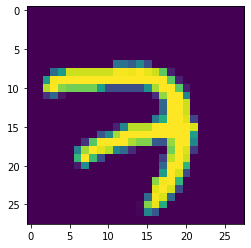

In [25]:
import matplotlib.pyplot as plt
plt.imshow(x[0].reshape(28,28))

In [26]:
# 784 -> 128 -> 64 -> 128 -> 784

In [27]:
# encoder
neuronios_entrada = 784
neuronios_oculta1 = 128

# imagem codificada
neuronios_oculta2 = 64

# decoder
neuronios_oculta3 = neuronios_oculta1
neuronios_saida = neuronios_entrada

In [28]:
import tensorflow as tf
tf.reset_default_graph()

In [29]:
xph = tf.placeholder(tf.float32, [None, neuronios_entrada])

In [30]:
# Inicialização Xavier (mais eficiente que a RandomNormal)

inicializador = tf.variance_scaling_initializer()

In [31]:
# 784 -> 128 -> 64 -> 128 -> 784

w = {'encoder_oculta1': tf.Variable(inicializador([neuronios_entrada, neuronios_oculta1])),
     'encoder_oculta2': tf.Variable(inicializador([neuronios_oculta1, neuronios_oculta2])),
     'decoder_oculta3': tf.Variable(inicializador([neuronios_oculta2, neuronios_oculta3])),
     'decoder_saida': tf.Variable(inicializador([neuronios_oculta3, neuronios_saida]))
}

In [32]:
b = {'encoder_oculta1': tf.Variable(inicializador([neuronios_oculta1])),
     'encoder_oculta2': tf.Variable(inicializador([neuronios_oculta2])),
     'decoder_oculta3': tf.Variable(inicializador([neuronios_oculta3])),
     'decoder_saida': tf.Variable(inicializador([neuronios_saida]))
}

In [33]:
camada_oculta1 = tf.nn.relu(tf.add(tf.matmul(xph, w['encoder_oculta1']), b['encoder_oculta1']))
camada_oculta2 = tf.nn.relu(tf.add(tf.matmul(camada_oculta1, w['encoder_oculta2']), b['encoder_oculta2']))
camada_oculta3 = tf.nn.relu(tf.add(tf.matmul(camada_oculta2, w['decoder_oculta3']), b['decoder_oculta3']))
camada_saida = tf.nn.relu(tf.add(tf.matmul(camada_oculta3, w['decoder_saida']), b['decoder_saida']))

In [34]:
erro = tf.losses.mean_squared_error(xph, camada_saida)
otimizador = tf.train.AdamOptimizer(0.001)
treinamento = otimizador.minimize(erro)
batch_size = 128

In [35]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoca in range(50):
        numero_batches = mnist.train.num_examples // batch_size
        for i in range(numero_batches):
            x_batch, _ = mnist.train.next_batch(batch_size)
            custo, _ = sess.run([erro, treinamento], feed_dict = {xph: x_batch})
        print('época: ' + str(epoca + 1) + ' erro: ' + str(custo))
        
    imagens_codificadas = sess.run(camada_oculta2, feed_dict = {xph: x})
    imagens_decodificadas = sess.run(camada_saida, feed_dict = {xph: x})

época: 1 erro: 0.01617876
época: 2 erro: 0.012461433
época: 3 erro: 0.0111219045
época: 4 erro: 0.009830988
época: 5 erro: 0.010750166
época: 6 erro: 0.009418962
época: 7 erro: 0.008689333
época: 8 erro: 0.0091825435
época: 9 erro: 0.009030328
época: 10 erro: 0.0085844165
época: 11 erro: 0.008512584
época: 12 erro: 0.007890665
época: 13 erro: 0.008476146
época: 14 erro: 0.00951779
época: 15 erro: 0.008750589
época: 16 erro: 0.008083352
época: 17 erro: 0.008552833
época: 18 erro: 0.008919801
época: 19 erro: 0.008392852
época: 20 erro: 0.008623476
época: 21 erro: 0.008555274
época: 22 erro: 0.008876948
época: 23 erro: 0.007838967
época: 24 erro: 0.008241085
época: 25 erro: 0.008975437
época: 26 erro: 0.008164293
época: 27 erro: 0.007320984
época: 28 erro: 0.008724405
época: 29 erro: 0.0074319225
época: 30 erro: 0.0076281168
época: 31 erro: 0.008651317
época: 32 erro: 0.0077948663
época: 33 erro: 0.008659021
época: 34 erro: 0.0076409457
época: 35 erro: 0.008490102
época: 36 erro: 0.008356

In [36]:
import numpy as np
numero_imagens = 5
imagens_teste = np.random.randint(x.shape[0], size = numero_imagens)
imagens_teste

array([34305, 14335, 26272, 29026, 36242])

0
34305
1
14335
2
26272
3
29026
4
36242


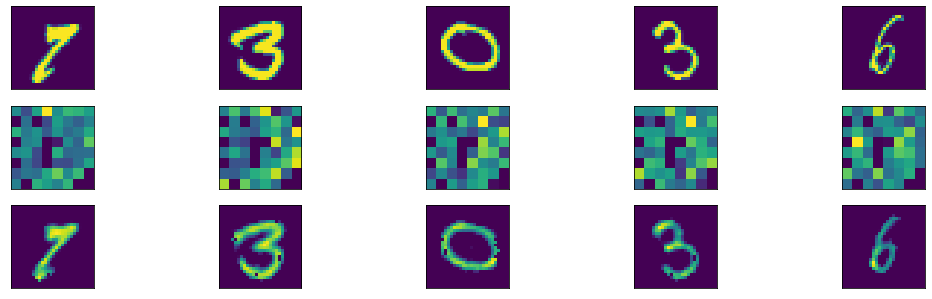

In [48]:
plt.figure(figsize = (18,18))
for i, indice_imagem in enumerate(imagens_teste):
    print(i)
    print(indice_imagem)
    
    eixo = plt.subplot(10,5, i + 1)
    plt.imshow(x[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    
    eixo = plt.subplot(10,5, i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8,8))
    plt.xticks(())
    plt.yticks(())
    
    
    
    eixo = plt.subplot(10,5, i + 1 + numero_imagens*2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())